# Customer Churn

## 1.Data Exploratory

In [8]:




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, validation_curve, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [10]:
df.shape

(5630, 20)

In [11]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

**CustomerID**: A unique identifier for each customer, often used to track individual
records.

**Churn**: Indicates whether the customer has left the service (churned) or not.
It'stypically a binary variable: 1 for churn and 0 for active customers.

**Tenure**: Represents the number of months the customer has been using the
service. A higher tenure often reflects customer loyalty.

**PreferredLoginDevice:** Specifies the device (e.g., mobile, desktop, tablet) that
the customer uses most frequently to log into the service.

**CityTier:** Refers to the classification of the city where the customer lives, often
based on economic activity or population size (e.g., Tier 1 for major cities, Tier 2
for smaller cities).

**WarehouseToHome:** Measures the distance (in kilometers or miles) between the
customer's home and the nearest warehouse of the service provider. It could
influence delivery times or satisfaction.

**PreferredPaymentMode:** Indicates the customer's chosen payment method,
such as credit card, cash on delivery, or online payment gateways.

**Gender:** The gender of the customer (e.g., Male, Female, or other categories).

**HourSpendOnApp:** The average number of hours the customer spends on the
app (per day or month). More hours might indicate higher engagement.

**NumberOfDeviceRegistered:** Counts the total number of devices (e.g., mobile
phones, tablets) the customer has linked to their account.
    
**PreferedOrderCat:** Refers to the category of products that the customer prefers
to order, like electronics, groceries, clothing, etc.

**SatisfactionScore:** A numerical rating (e.g., 1 to 5 or 1 to 10) that reflects how
satisfied the customer is with the service.

**MaritalStatus:** Indicates whether the customer is single, married, divorced, etc. It
might relate to customer preferences or spending habits.

**NumberOfAddress:** The number of addresses the customer has registered with
the service (e.g., home, work, or alternate delivery addresses).

**Complain:** A binary value (e.g., 1 or 0) indicating whether the customer has
lodged a complaint about the service.

**OrderAmountHikeFromlastYear:** The percentage increase in the amount spent
on orders compared to the previous year, which shows spending trends.

**CouponUsed:** Counts how many coupons the customer has used for discounts or
promotions in the service.
                                                    
**OrderCount:** The total number of orders the customer has placed on the
platform.

**DaySinceLastOrder:** The number of days since the customer last placed an order.
Higher values might indicate disengagement.

**CashbackAmount:** The total cashback amount (usually in currency terms) that
the customer has received from using the service.

### **1.1 Handling Duplicates & Missing Values**

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [14]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [15]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:')
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode

the values are:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

the values are:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

the values are:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

the values are:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [16]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



In [17]:
from sklearn.impute import SimpleImputer


In [18]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


In [19]:
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols)
    ])

df_imputed = preprocessor.fit_transform(df)


In [21]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer
numerical_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                  'OrderAmountHikeFromlastYear', 'CouponUsed',
                  'OrderCount', 'DaySinceLastOrder']

categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode']


In [23]:
df.sample(10)

CustomerID  Churn     Tenure PreferredLoginDevice  CityTier  \
2795     52796.0    0.0   8.000000         Mobile Phone       2.0   
3087     53088.0    0.0   1.000000         Mobile Phone       3.0   
3841     53842.0    0.0   2.000000         Mobile Phone       1.0   
1248     51249.0    0.0  10.189899             Computer       1.0   
4653     54654.0    0.0  18.000000         Mobile Phone       2.0   
5082     55083.0    0.0  18.000000         Mobile Phone       1.0   
571      50572.0    0.0  18.000000             Computer       1.0   
5209     55210.0    0.0   4.000000         Mobile Phone       3.0   
2797     52798.0    1.0  13.000000             Computer       3.0   
5059     55060.0    0.0  23.000000         Mobile Phone       1.0   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
2795             32.0           Debit Card  Female             2.0   
3087             11.0           Debit Card  Female             3.0   
3841             34.0          Credit Card  Female             3.0   
1248             14.0                   CC  Female             2.0   
4653              7.0           Debit Card  Female             3.0   
5082             11.0           Debit Card    Male             4.0   
571              10.0           Debit Card    Male             2.0   
5209             23.0           Debit Card    Male             4.0   
2797              7.0           Debit Card    Male             3.0   
5059             11.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
2795                       3.0             Fashion                1.0   
3087                       5.0  Laptop & Accessory                2.0   
3841                       6.0  Laptop & Accessory                5.0   
1248                       4.0  Laptop & Accessory                4.0   
4653                       5.0  Laptop & Accessory                3.0   
5082                       2.0              Others                5.0   
571                        3.0  Laptop & Accessory                4.0   
5209                       4.0  Laptop & Accessory                3.0   
2797                       3.0  Laptop & Accessory                3.0   
5059                       5.0              Others                3.0   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
2795        Single              2.0       1.0                    16.000000   
3087        Single              3.0       1.0                    12.000000   
3841       Married              2.0       0.0                    22.000000   
1248       Married              2.0       1.0                    16.000000   
4653        Single              6.0       0.0                    12.000000   
5082       Married              3.0       0.0                    15.707922   
571       Divorced              2.0       0.0                    12.000000   
5209       Married             10.0       0.0                    16.000000   
2797       Married              8.0       0.0                    12.000000   
5059       Married              4.0       0.0                    15.707922   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
2795         1.0         1.0                7.0          188.37  
3087         1.0         2.0                4.0          169.87  
3841         2.0         2.0                1.0           25.00  
1248         1.0         1.0                7.0          121.33  
4653         2.0         2.0                3.0          184.85  
5082         3.0        15.0               14.0          316.90  
571          1.0         1.0                8.0          144.47  
5209         2.0         3.0                3.0          178.01  
2797         1.0         1.0                1.0          167.28  
5059         1.0         2.0                1.0          312.11

### **1.2 Map binary values to meaningful labels**

In [24]:
df['Churn'] = df['Churn'].map({1: 'Churned', 0: 'Not Churned'})
df['Complain'] = df['Complain'].map({1: 'Complain', 0: 'No Complain'})

In [25]:
df['CityTier'] = df['CityTier'].map({1: 'Tier 1 - Metropolitan',
                                     2: 'Tier 2 - Moderate Urban',
                                     3: 'Tier 3 - Rural/Small Town'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   float64
 1   Churn                        5630 non-null   object 
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   float64
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   float64
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [27]:
df.drop(['CustomerID'],axis=1, inplace=True)

### **1.3 Data Description**

In [28]:
df.describe().transpose()

count        mean        std   min     25%  \
Tenure                       5630.0   10.189899   8.354164   0.0    3.00   
WarehouseToHome              5630.0   15.639896   8.339095   5.0    9.00   
HourSpendOnApp               5630.0    2.931535   0.705384   0.0    2.00   
NumberOfDeviceRegistered     5630.0    3.688988   1.023999   1.0    3.00   
SatisfactionScore            5630.0    3.066785   1.380194   1.0    2.00   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.00   
OrderAmountHikeFromlastYear  5630.0   15.707922   3.587926  11.0   13.00   
CouponUsed                   5630.0    1.751023   1.851038   0.0    1.00   
OrderCount                   5630.0    3.008004   2.871521   1.0    1.00   
DaySinceLastOrder            5630.0    4.543491   3.553382   0.0    2.00   
CashbackAmount               5630.0  177.223030  49.207036   0.0  145.77   

                                50%         75%     max  
Tenure                         9.00   15.000000   61.00  
WarehouseToHome               14.00   20.000000  127.00  
HourSpendOnApp                 3.00    3.000000    5.00  
NumberOfDeviceRegistered       4.00    4.000000    6.00  
SatisfactionScore              3.00    4.000000    5.00  
NumberOfAddress                3.00    6.000000   22.00  
OrderAmountHikeFromlastYear   15.00   18.000000   26.00  
CouponUsed                     1.00    2.000000   16.00  
OrderCount                     2.00    3.008004   16.00  
DaySinceLastOrder              4.00    7.000000   46.00  
CashbackAmount               163.28  196.392500  324.99

In [29]:
for i in df.columns:
    print(df[i].isnull().sum() > 0)


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


## **2.Data Analysis & Visualizations**

### **2.1.Basic Visualizations**

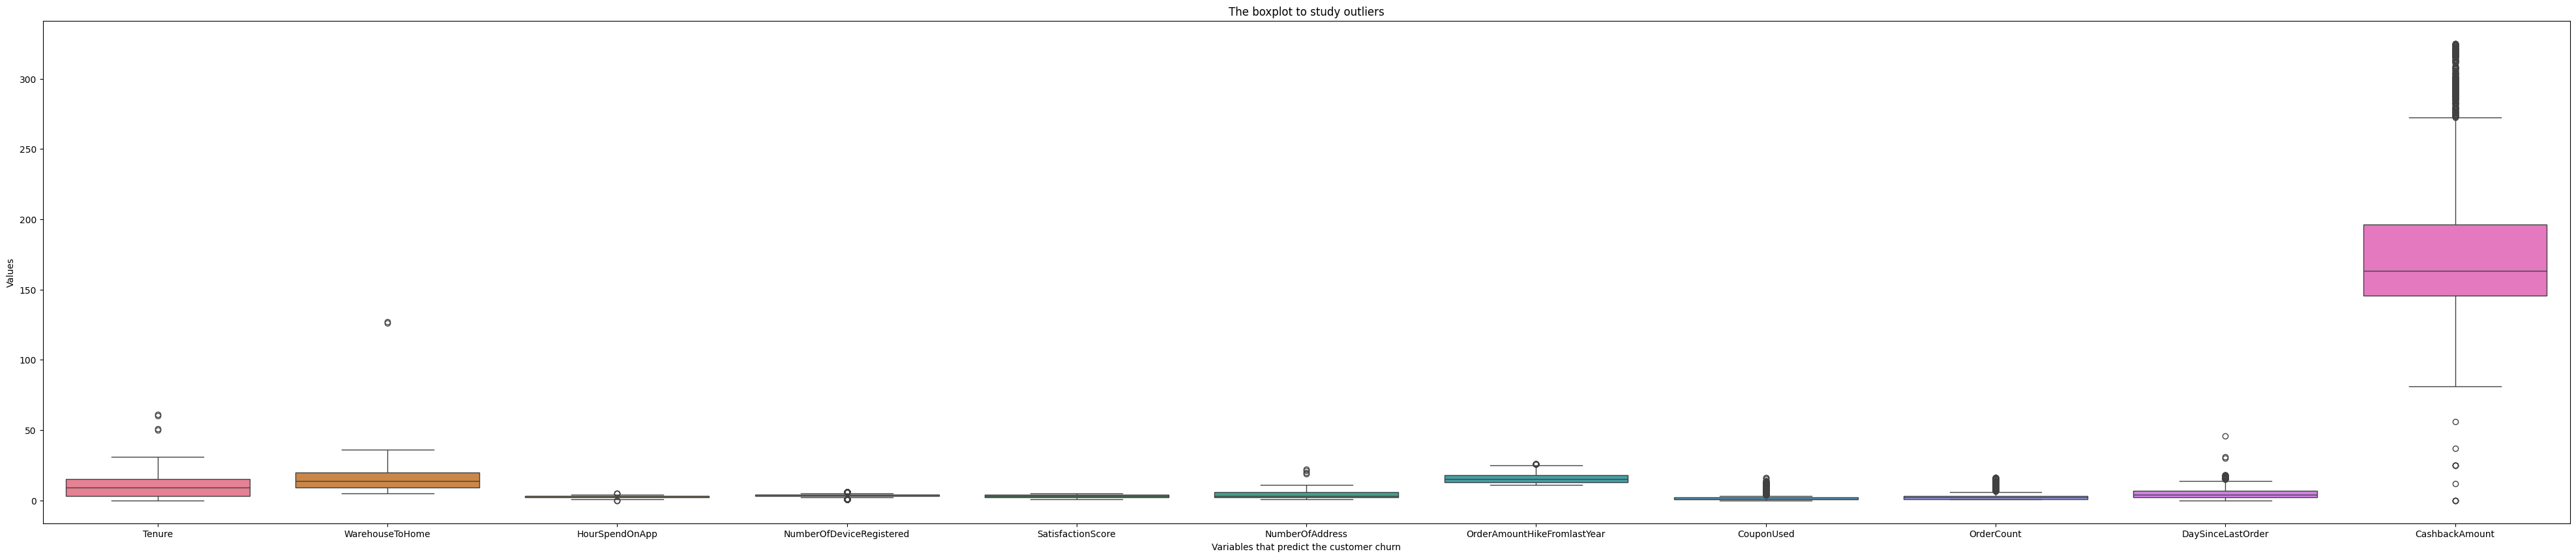

In [30]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')
plt.show()

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [32]:
for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

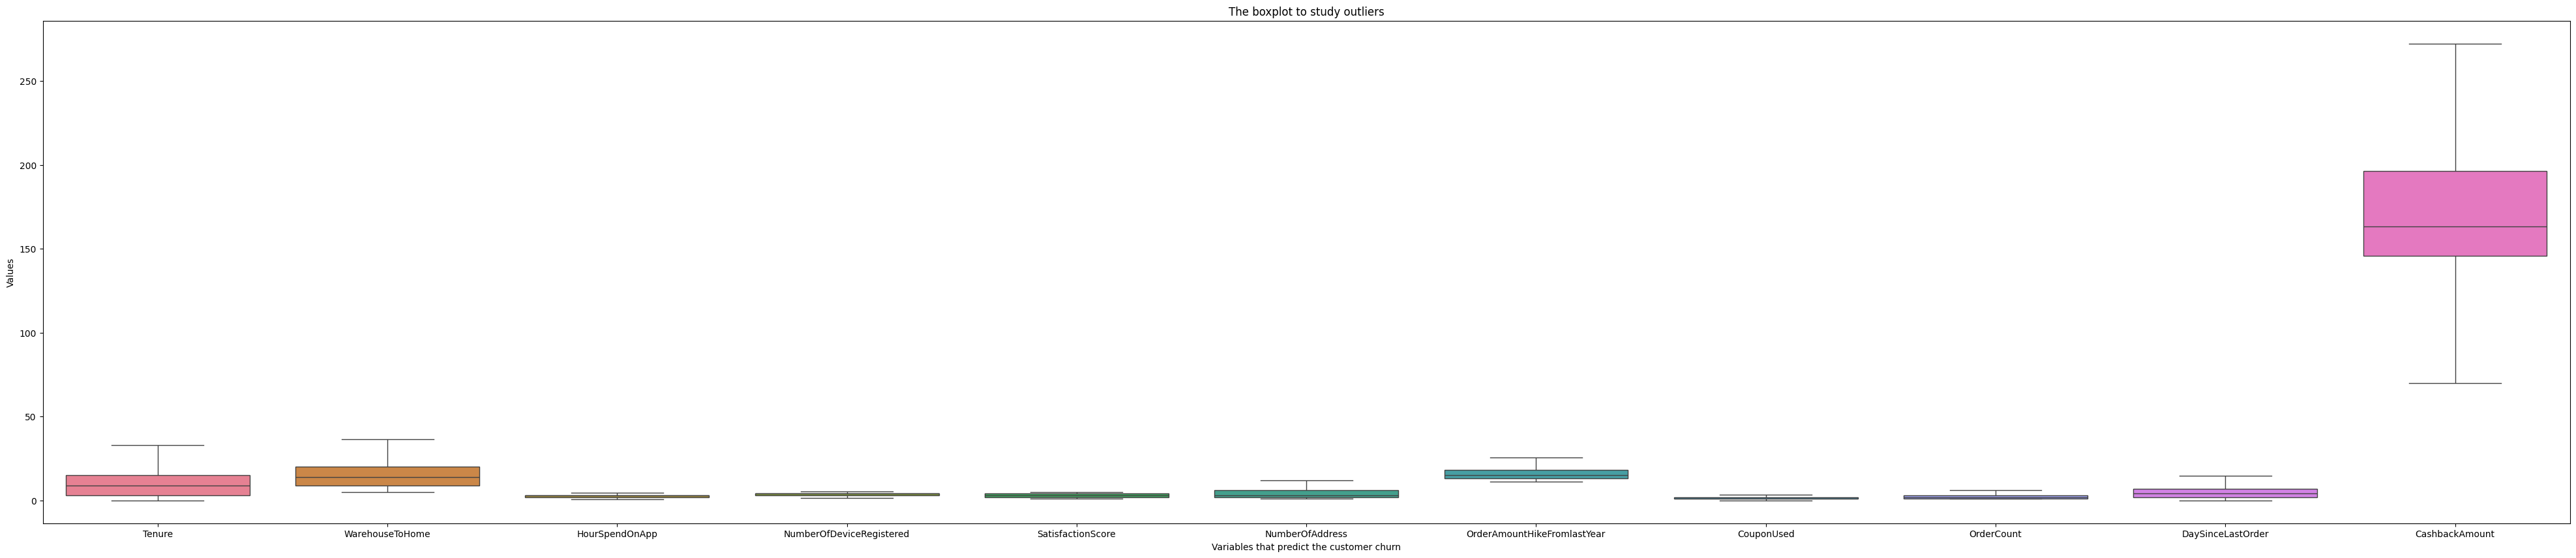

In [33]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')
plt.show()

### **2.2.Distribution plots**

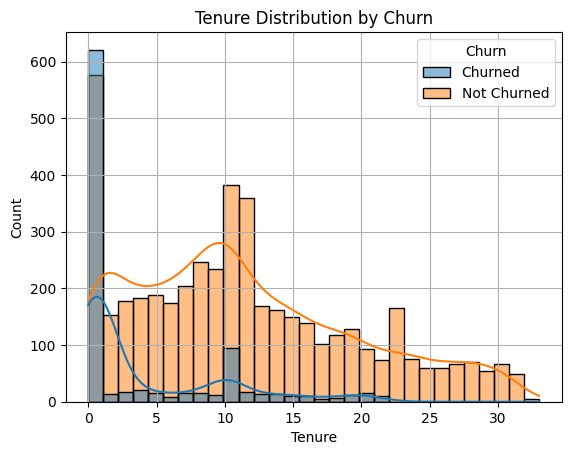

In [34]:
sns.histplot(data=df, x='Tenure', hue='Churn', kde=True, bins=30)
plt.title("Tenure Distribution by Churn")
plt.grid(True)
plt.show()


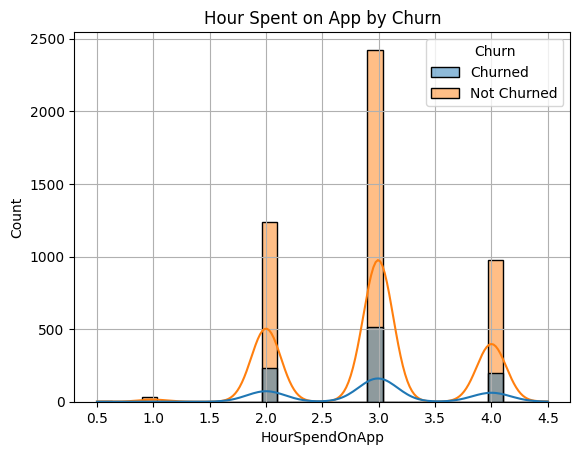

In [35]:
sns.histplot(data=df, x='HourSpendOnApp', hue='Churn', kde=True, bins=30)
plt.title("Hour Spent on App by Churn")
plt.grid(True)
plt.show()


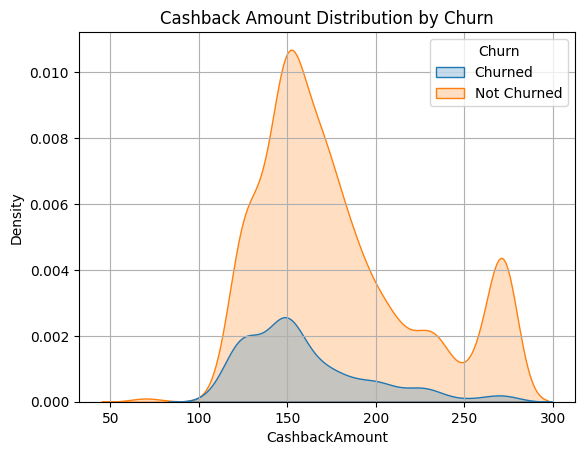

In [36]:
sns.kdeplot(data=df, x='CashbackAmount', hue='Churn', shade=True)
plt.title("Cashback Amount Distribution by Churn")
plt.grid(True)
plt.show()

### **2.3 Comparison Plots**

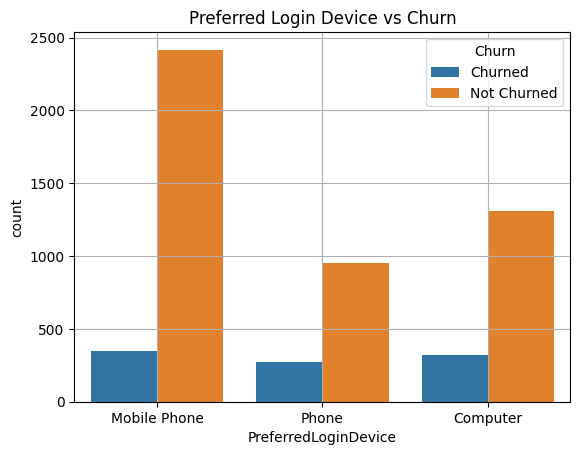

In [37]:
sns.countplot(data=df, x='PreferredLoginDevice', hue='Churn')
plt.title("Preferred Login Device vs Churn")
plt.grid(True)
plt.show()

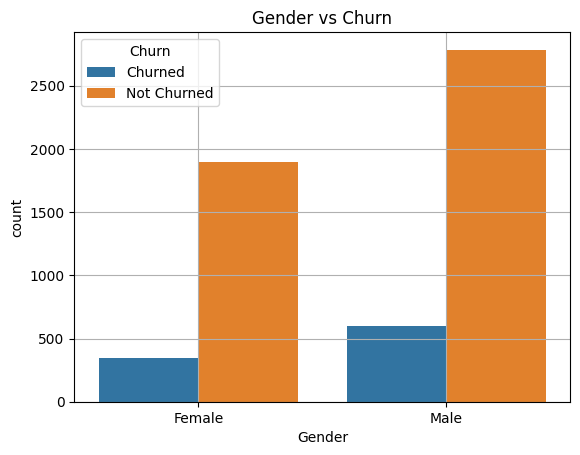

In [38]:
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title("Gender vs Churn")
plt.grid(True)
plt.show()

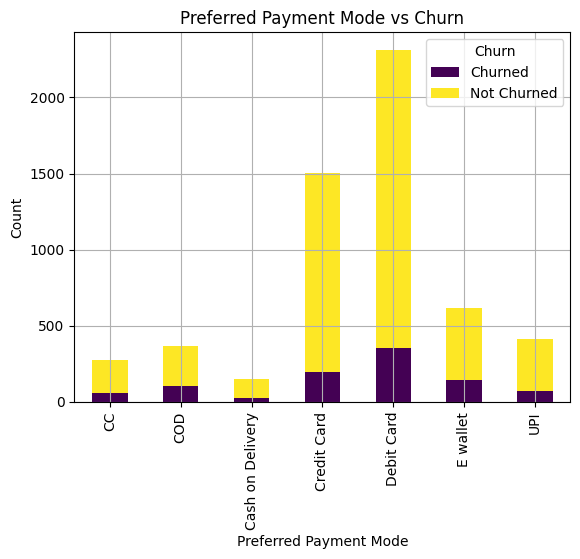

In [39]:
crosstab = pd.crosstab(df['PreferredPaymentMode'], df['Churn'])
crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Preferred Payment Mode vs Churn")
plt.xlabel("Preferred Payment Mode")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### **2.4 Realtionship Plots**

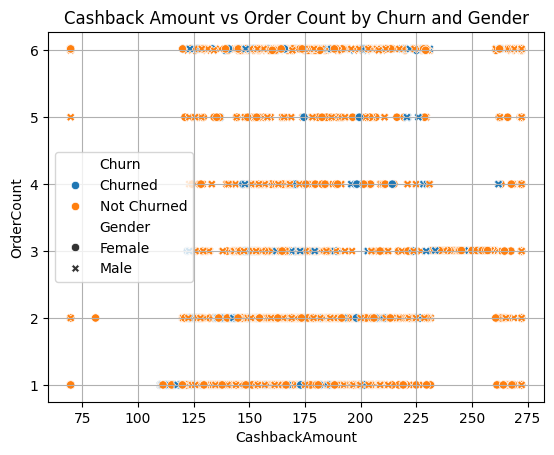

In [40]:
sns.scatterplot(data=df, x='CashbackAmount', y='OrderCount', hue='Churn', style='Gender')
plt.title("Cashback Amount vs Order Count by Churn and Gender")
plt.grid(True)
plt.show()

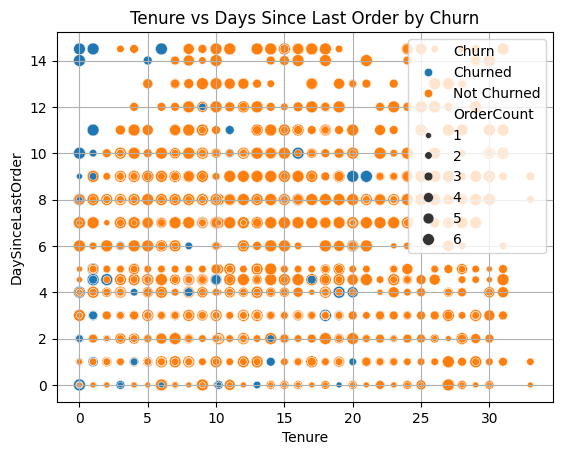

In [41]:
sns.scatterplot(data=df, x='Tenure', y='DaySinceLastOrder', hue='Churn', size='OrderCount')
plt.title("Tenure vs Days Since Last Order by Churn")
plt.grid(True)
plt.show()

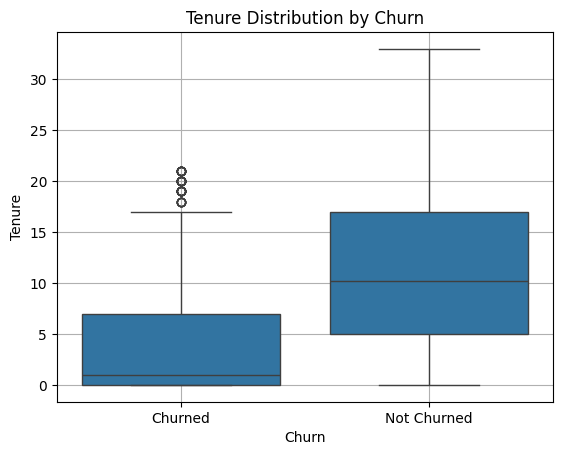

In [42]:
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title("Tenure Distribution by Churn")
plt.grid(True)
plt.show()

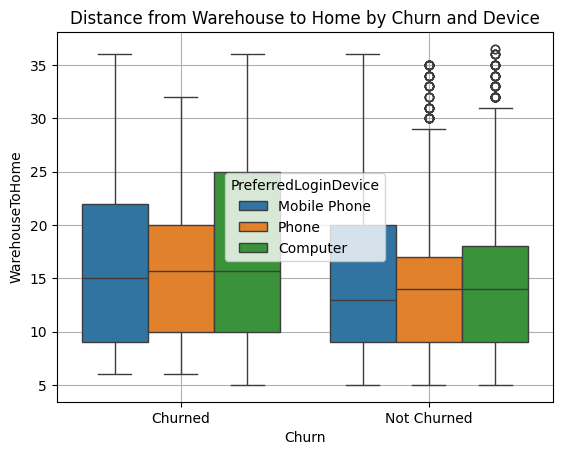

In [43]:
sns.boxplot(data=df, x='Churn', y='WarehouseToHome', hue='PreferredLoginDevice')
plt.title("Distance from Warehouse to Home by Churn and Device")
plt.grid(True)
plt.show()

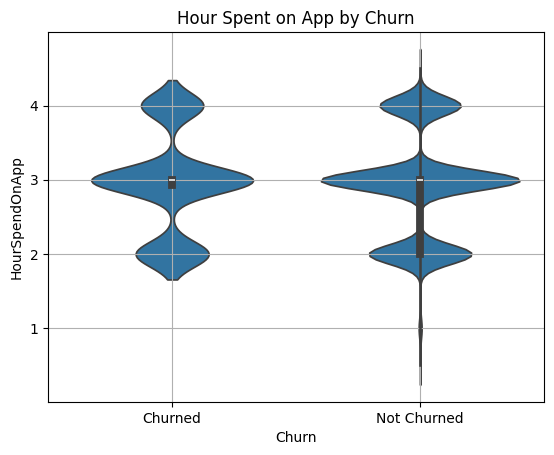

In [44]:
sns.violinplot(data=df, x='Churn', y='HourSpendOnApp')
plt.title("Hour Spent on App by Churn")
plt.grid(True)
plt.show()

### **2.5 Aggregated Insights**

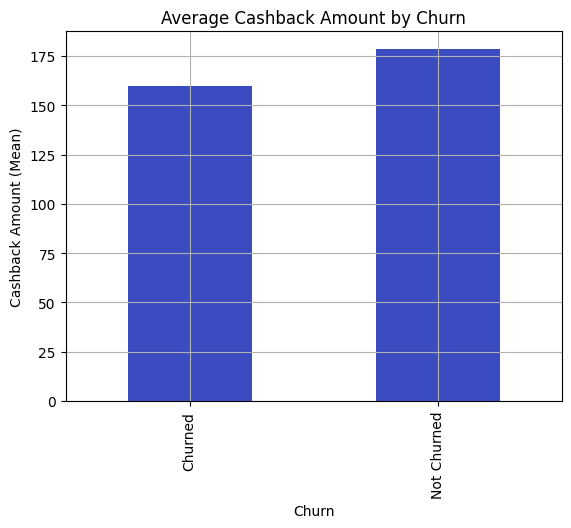

In [45]:
grouped = df.groupby('Churn')['CashbackAmount'].mean()
grouped.plot(kind='bar', colormap='coolwarm')
plt.title("Average Cashback Amount by Churn")
plt.ylabel("Cashback Amount (Mean)")
plt.grid(True)
plt.show()

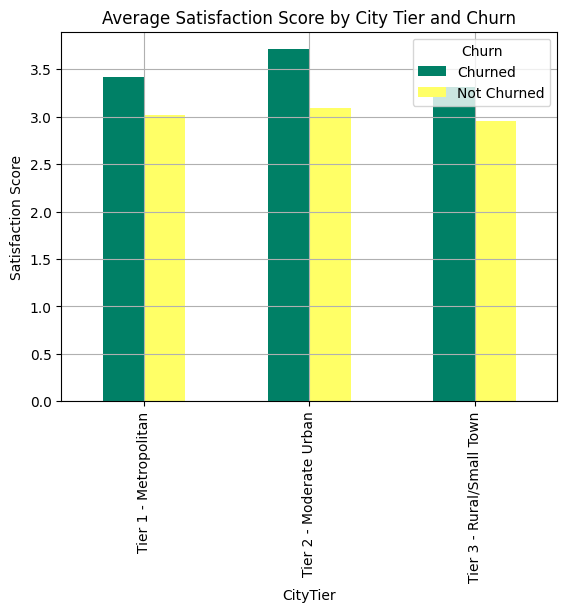

In [46]:
pivot = df.pivot_table(index='CityTier', columns='Churn', values='SatisfactionScore', aggfunc='mean')
pivot.plot(kind='bar', colormap='summer')
plt.title("Average Satisfaction Score by City Tier and Churn")
plt.ylabel("Satisfaction Score")
plt.grid(True)
plt.show()

### **2.6 Relation Plots**

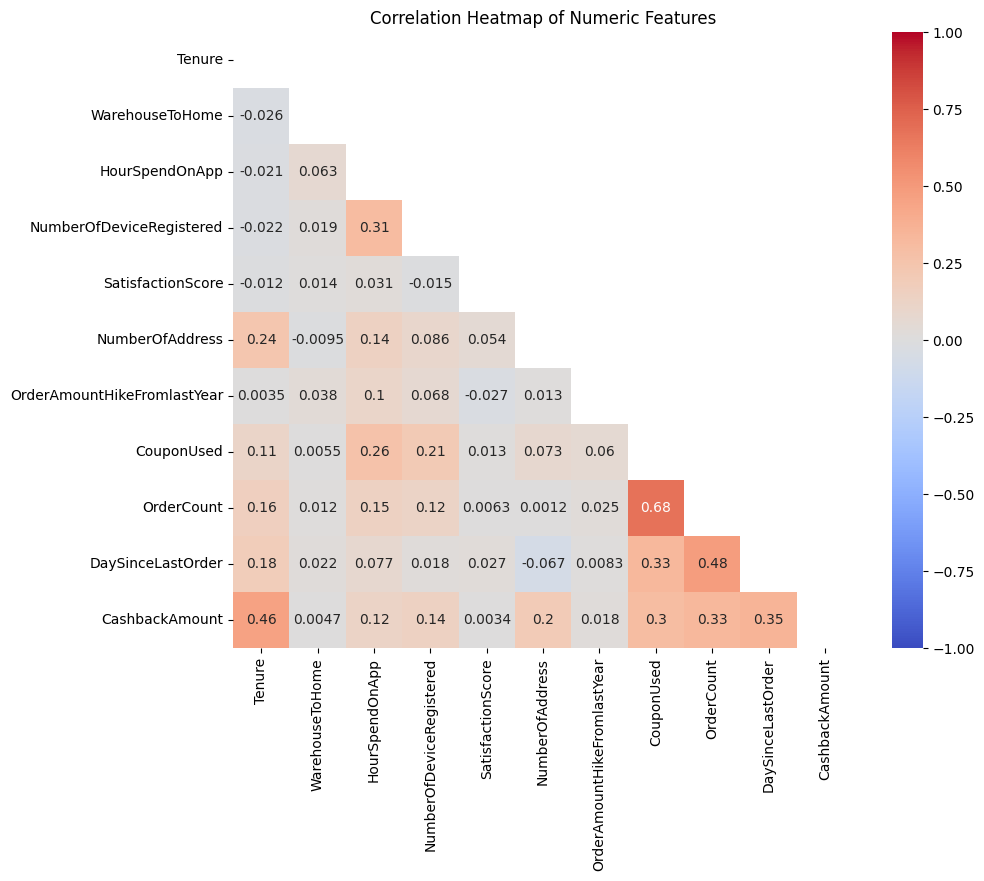

In [47]:

numeric_cols = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
    'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, mask=mask)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

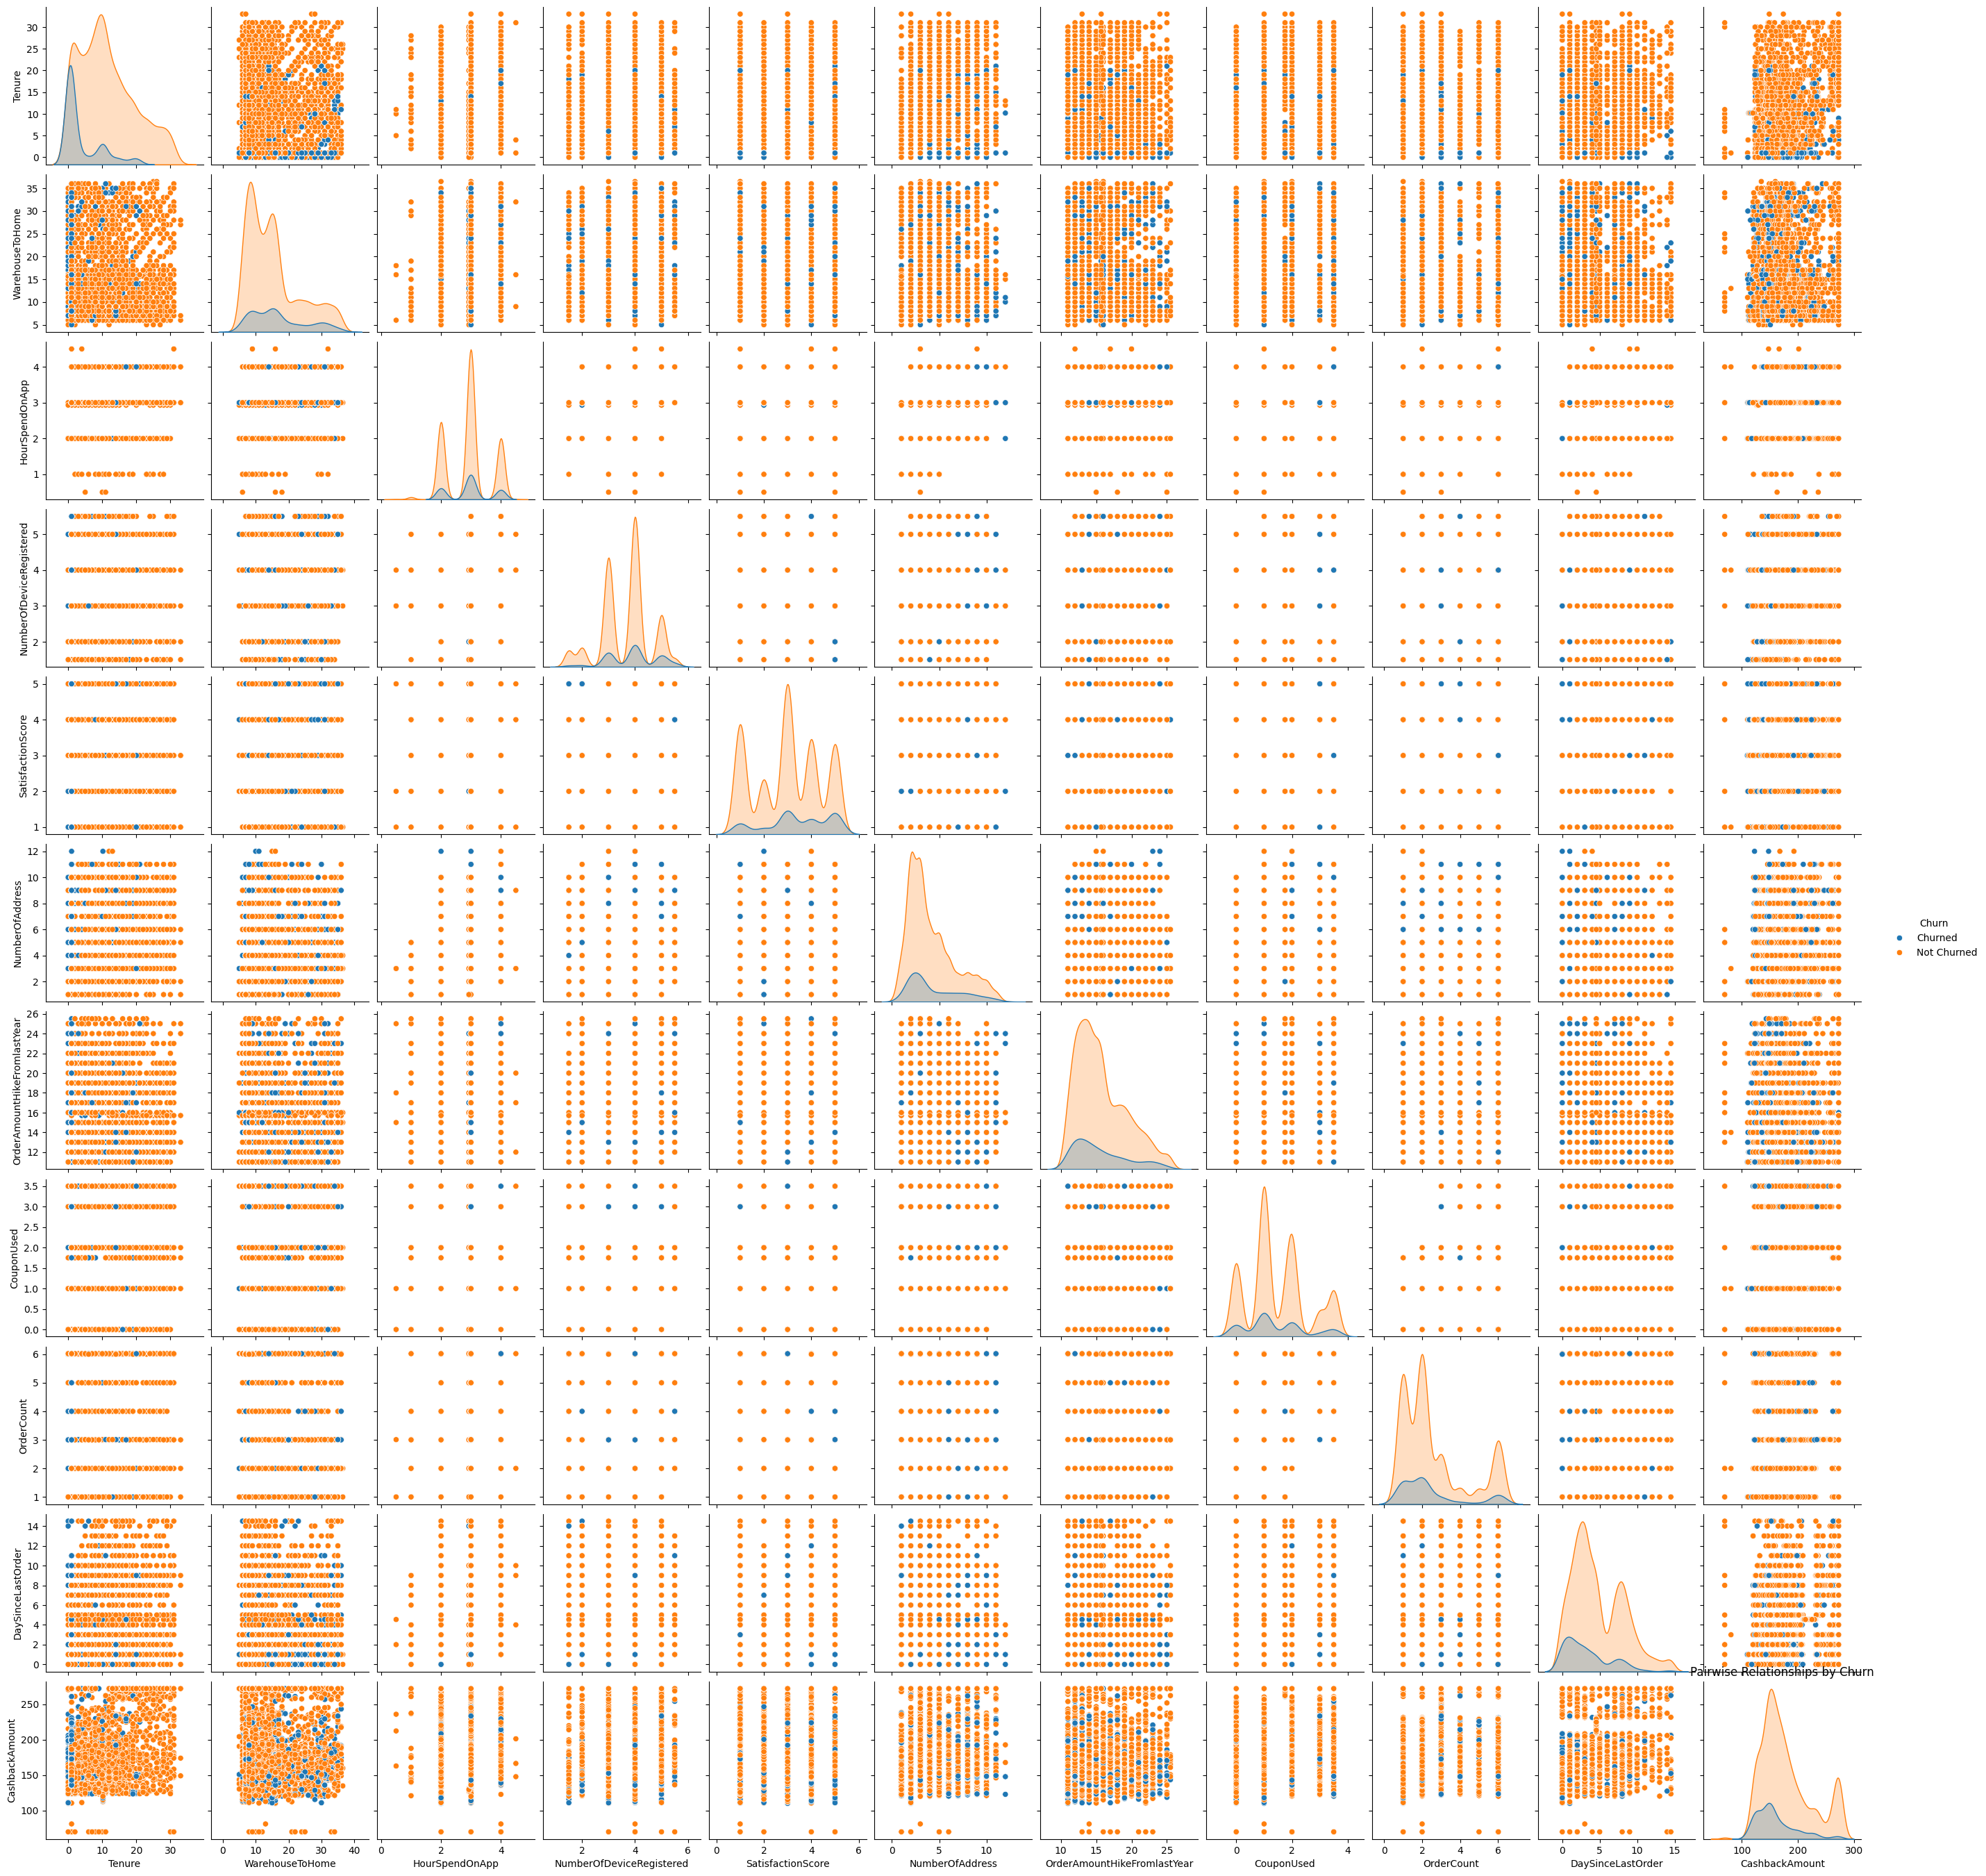

In [48]:
sns.pairplot(df, hue='Churn', vars=numeric_cols)
plt.title("Pairwise Relationships by Churn")
plt.show()

### **2.7 Churn Ratios**

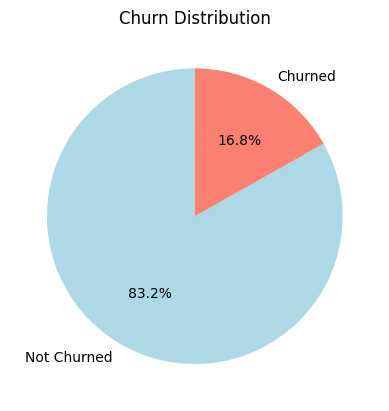

In [49]:
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title("Churn Distribution")
plt.show()

\


### **2.10 Clustered Heatmap**

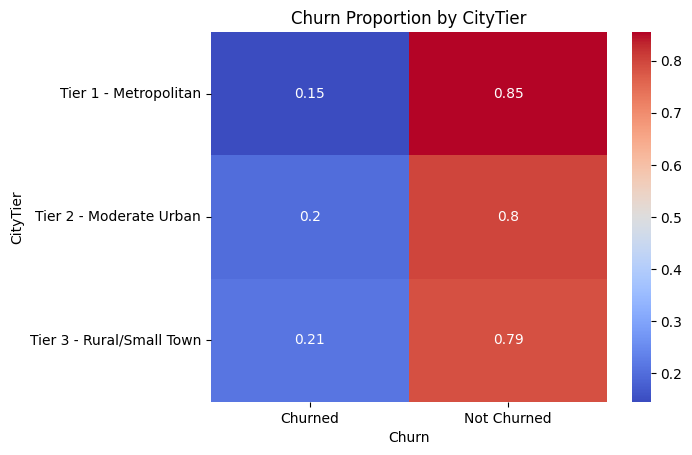

In [50]:
pivot_table = pd.crosstab(df['CityTier'], df['Churn'], normalize='index')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title("Churn Proportion by CityTier")
plt.show()

### **2.11 Bubble Chart**

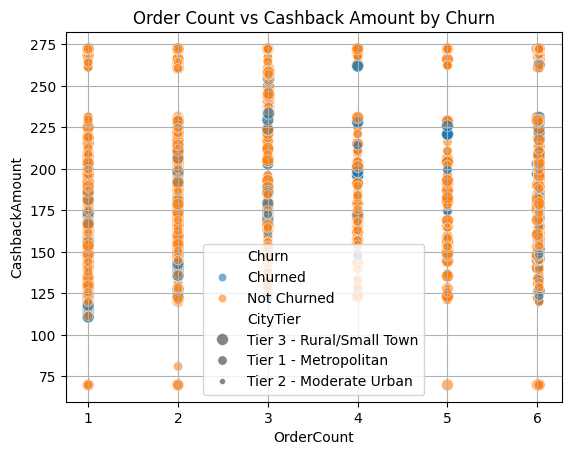

In [51]:
sns.scatterplot(data=df, x='OrderCount', y='CashbackAmount', size='CityTier', hue='Churn', alpha=0.6)
plt.title("Order Count vs Cashback Amount by Churn")
plt.grid(True)
plt.show()

### **2.12 Cohort Analysis**

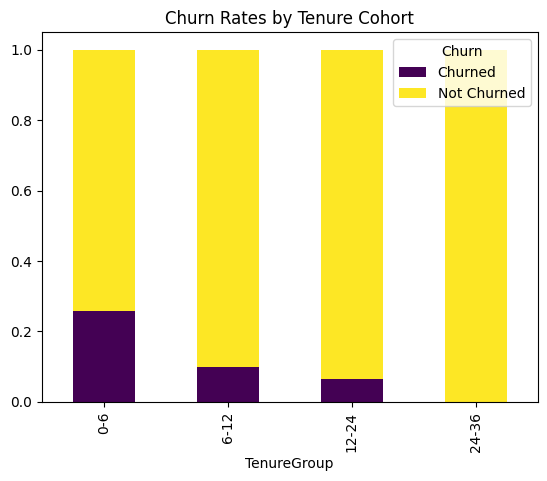

In [52]:
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 6, 12, 24, 36], labels=['0-6', '6-12', '12-24', '24-36'])
churn_rates = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack()

churn_rates.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Churn Rates by Tenure Cohort")
plt.show()

### **2.13 Decision Tree Visualization**

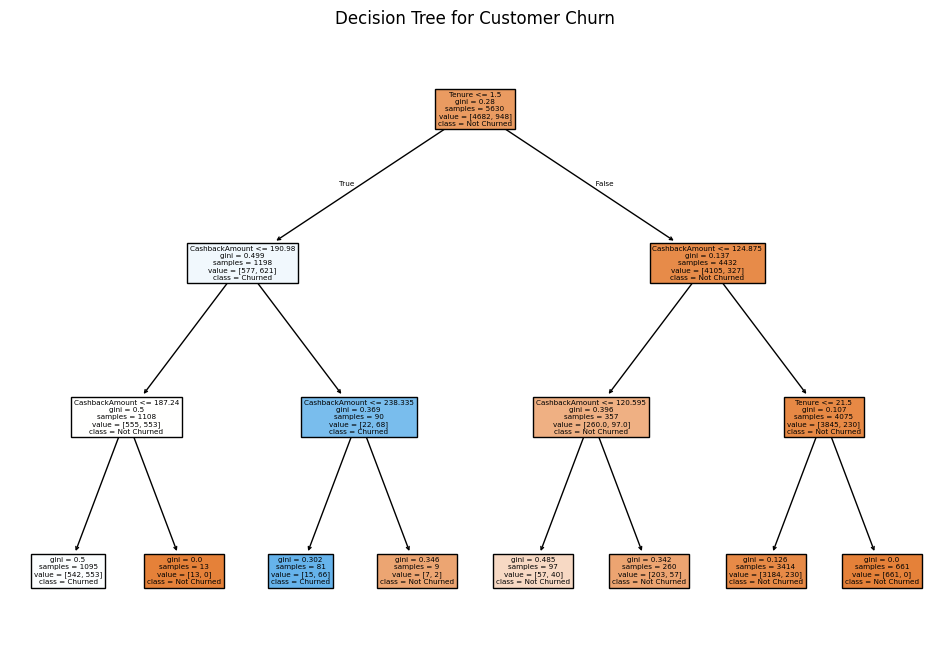

In [53]:
X = df[['Tenure', 'CashbackAmount', 'HourSpendOnApp']]
y = df['Churn'].map({'Churned': 1, 'Not Churned': 0})

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=['Tenure', 'CashbackAmount', 'HourSpendOnApp'], class_names=['Not Churned', 'Churned'], filled=True)
plt.title("Decision Tree for Customer Churn")
plt.show()

## **3. Machine Learning Pre-Processing**

### **3.1 Remapping Previously Mapped Columns**

In [54]:
df['Churn'] = df['Churn'].map({'Not Churned': 0, 'Churned': 1})

df['Complain'] = df['Complain'].map({'No Complain': 0, 'Complain': 1})

df['CityTier'] = df['CityTier'].map({'Tier 1 - Metropolitan': 1,
                                     'Tier 2 - Moderate Urban': 2,
                                     'Tier 3 - Rural/Small Town': 3})

### **3.2 One Hot-Encoder**

In [55]:
df = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode',
                                 'Gender', 'PreferedOrderCat', 'MaritalStatus'], drop_first=True)

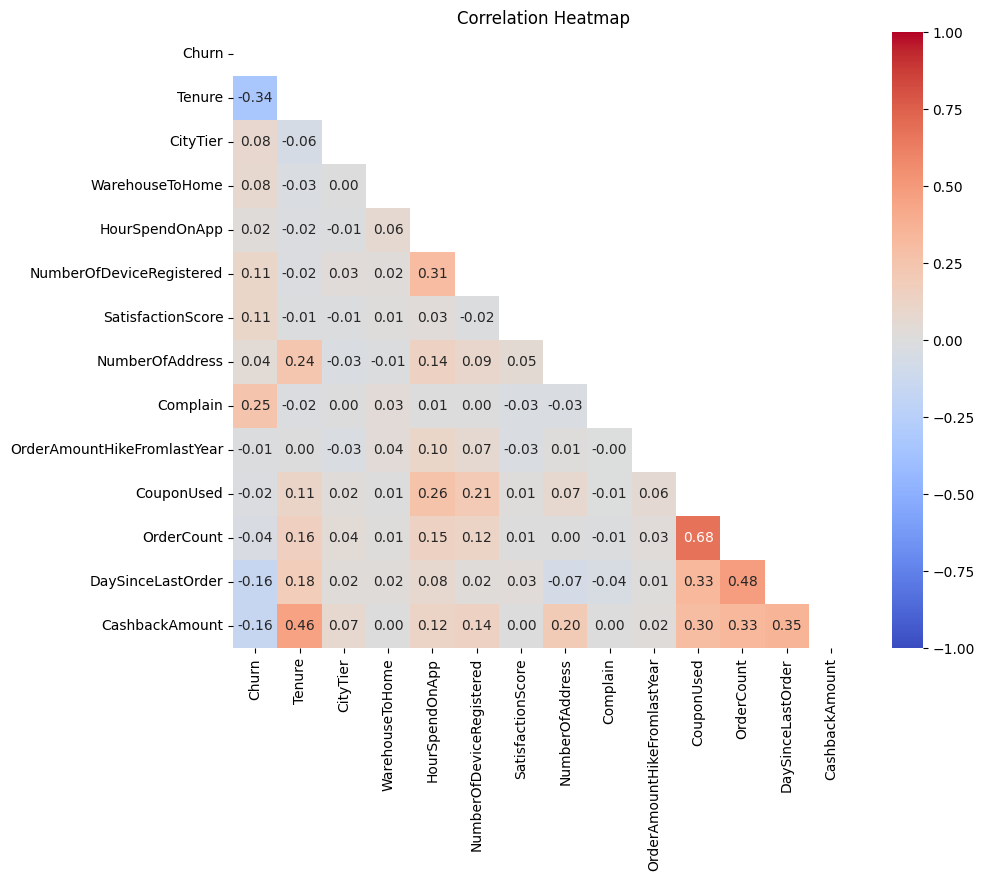

In [56]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1,mask=mask)
plt.title("Correlation Heatmap")
plt.show()


### **3.3 Feature Scaling**

In [57]:
df = df.drop(columns=['TenureGroup'], errors='ignore')

print("Columns after dropping TenureGroup:", df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5630 non-null   int64  
 1   Tenure                                 5630 non-null   float64
 2   CityTier                               5630 non-null   int64  
 3   WarehouseToHome                        5630 non-null   float64
 4   HourSpendOnApp                         5630 non-null   float64
 5   NumberOfDeviceRegistered               5630 non-null   float64
 6   SatisfactionScore                      5630 non-null   float64
 7   NumberOfAddress                        5630 non-null   float64
 8   Complain                               5630 non-null   int64  
 9   OrderAmountHikeFromlastYear            5630 non-null   float64
 10  CouponUsed                             5630 non-null   float64
 11  Orde

In [58]:
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### **3.4 Splitting**

In [59]:
X = df.drop(columns=[ 'Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **4.Machine Learning**

### **4.1 Traing Models Before Feature Selection**

#### 4.1.2 Logistic Regression

In [60]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [61]:
lr_preds = lr_model.predict(X_test)
print(classification_report(y_test,lr_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1414
           1       0.74      0.50      0.60       275

    accuracy                           0.89      1689
   macro avg       0.82      0.73      0.77      1689
weighted avg       0.88      0.89      0.88      1689



**Confusion Matrix**

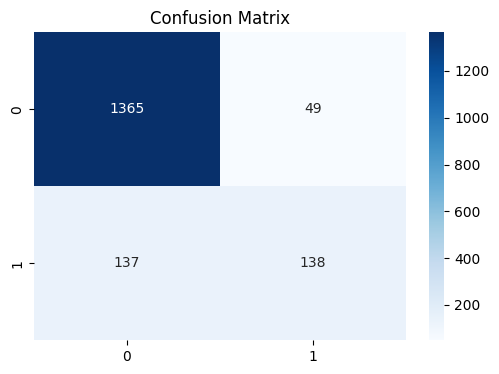

In [62]:
corr=confusion_matrix(y_test,lr_preds)
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

**Bias & Varience Trade Off**

In [63]:
lr_preds = np.array(y)

variance = np.var(lr_preds)

mse = np.mean((y - np.mean(lr_preds))**2)

bias_squared = np.mean((np.mean(lr_preds) - y)**2)

total_error = bias_squared + variance

In [64]:
print(f"Variance: {variance}")
print(f"Bias Squared: {bias_squared}")
print(f"Total Error: {total_error}")

Variance: 0.14003060236174517
Bias Squared: 0.14003060236174517
Total Error: 0.28006120472349033


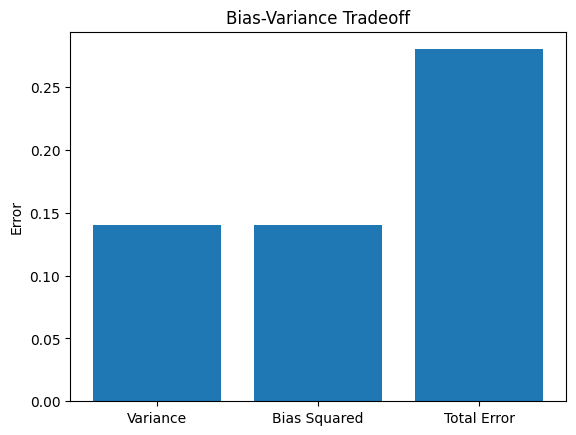

In [65]:
plt.bar(['Variance', 'Bias Squared', 'Total Error'], [variance, bias_squared, total_error])
plt.title('Bias-Variance Tradeoff')
plt.ylabel('Error')
plt.show()

**Cross Validation & Error Estimation**

In [66]:
model = LogisticRegression(random_state=42)

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []

for train_index, val_index in skfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_fold, y_train_fold)

    y_pred = model.predict(X_val_fold)

    cv_results.append(accuracy_score(y_val_fold, y_pred))

print(f"Cross-validation accuracies: {cv_results}")
print(f"Mean CV accuracy: {sum(cv_results) / len(cv_results):.4f}")
print(f"Standard deviation: {np.std(cv_results):.4f}")

Cross-validation accuracies: [0.8770595690747782, 0.8769035532994924, 0.883248730964467, 0.8705583756345178, 0.8769035532994924]
Mean CV accuracy: 0.8769
Standard deviation: 0.0040


### **4.2 Training Model With Feature Selection**

#### 4.2.1 Feature Selection & Splitting

In [67]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X, y)

feature_scores = pd.Series(
    np.abs(model.coef_[0]),
    index=X.columns
)

feature_scores = feature_scores.sort_values(ascending=False)

print("Feature Scores:")
print(feature_scores)


Feature Scores:
PreferedOrderCat_Others                  2.267339
PreferedOrderCat_Laptop & Accessory      1.818039
Complain                                 1.741927
Tenure                                   1.622298
PreferredPaymentMode_Cash on Delivery    1.032953
PreferedOrderCat_Mobile Phone            0.910936
PreferredPaymentMode_E wallet            0.785789
MaritalStatus_Single                     0.702091
PreferredPaymentMode_COD                 0.689031
PreferedOrderCat_Grocery                 0.615982
PreferedOrderCat_Mobile                  0.592562
PreferredLoginDevice_Phone               0.527300
NumberOfDeviceRegistered                 0.436746
OrderCount                               0.398290
DaySinceLastOrder                        0.388797
PreferredLoginDevice_Mobile Phone        0.366379
CityTier                                 0.356162
Gender_Male                              0.323853
WarehouseToHome                          0.320054
MaritalStatus_Married             

In [68]:
threshold = 0.2 * feature_scores.max()
selected_features = feature_scores[feature_scores > threshold].index

print("Selected Features Based on Threshold:")
print(selected_features)

Selected Features Based on Threshold:
Index(['PreferedOrderCat_Others', 'PreferedOrderCat_Laptop & Accessory',
       'Complain', 'Tenure', 'PreferredPaymentMode_Cash on Delivery',
       'PreferedOrderCat_Mobile Phone', 'PreferredPaymentMode_E wallet',
       'MaritalStatus_Single', 'PreferredPaymentMode_COD',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Mobile',
       'PreferredLoginDevice_Phone'],
      dtype='object')


In [69]:
dff = X[selected_features]
dff = dff.astype(int)
print("Shape of dff (Selected Features):", dff.shape)


Shape of dff (Selected Features): (5630, 12)


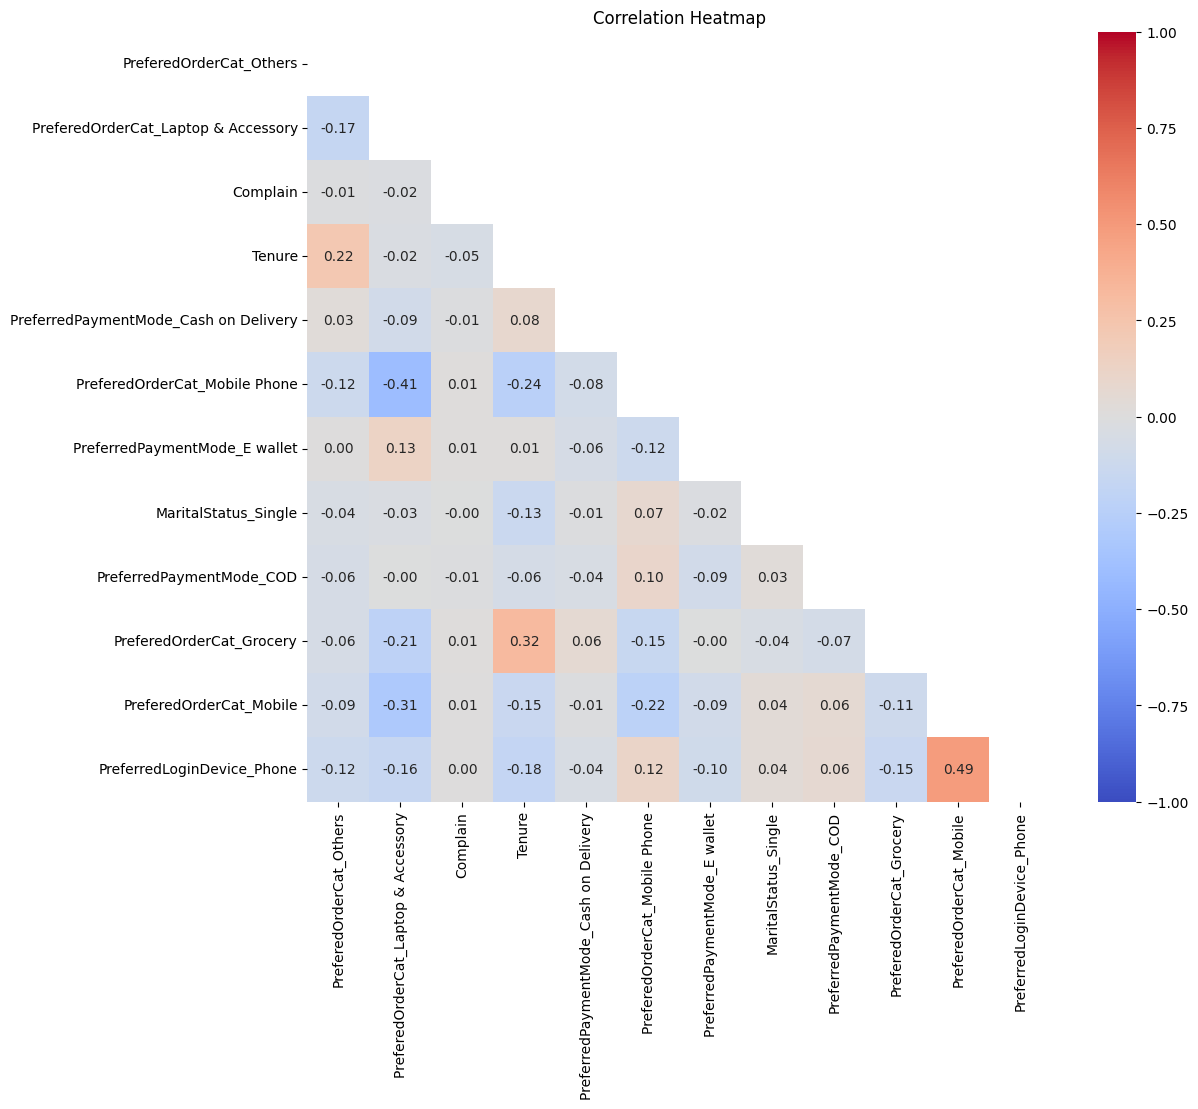

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data = dff.select_dtypes(include=np.number)

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    mask=mask
)

plt.title("Correlation Heatmap")
plt.show()


In [71]:
X_train, X_test, y_train, y_test = train_test_split(dff, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4504, 12)
X_test shape: (1126, 12)
y_train shape: (4504,)
y_test shape: (1126,)


#### 4.2.3 Logistic Regression

In [72]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [73]:
lr_preds = lr_model.predict(X_test)
print(classification_report(y_test,lr_preds))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       941
           1       0.74      0.43      0.55       185

    accuracy                           0.88      1126
   macro avg       0.82      0.70      0.74      1126
weighted avg       0.87      0.88      0.87      1126



**Confusion Matrix**

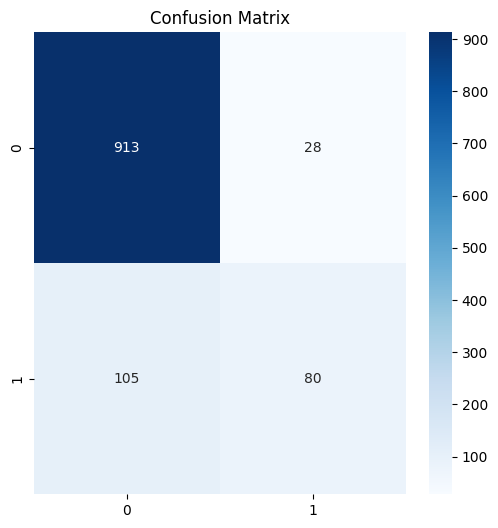

In [74]:
corr=confusion_matrix(y_test,lr_preds)
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.0f')
plt.title('Confusion Matrix')
plt.show()

**Bias & Varience Trade Off**

In [75]:
lr_preds = np.array(y)

variance = np.var(lr_preds)

mse = np.mean((y - np.mean(lr_preds))**2)

bias_squared = np.mean((np.mean(lr_preds) - y)**2)

total_error = bias_squared + variance

In [76]:
print(f"Variance: {variance}")
print(f"Bias Squared: {bias_squared}")
print(f"Total Error: {total_error}")

Variance: 0.14003060236174517
Bias Squared: 0.14003060236174517
Total Error: 0.28006120472349033


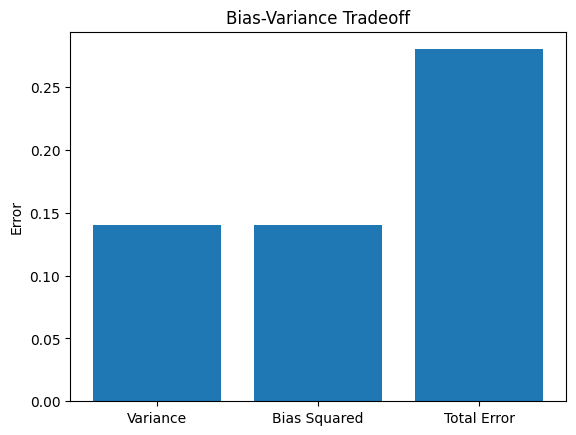

In [77]:
plt.bar(['Variance', 'Bias Squared', 'Total Error'], [variance, bias_squared, total_error])
plt.title('Bias-Variance Tradeoff')
plt.ylabel('Error')
plt.show()

**Cross Validation & Error Estimation**

In [78]:
model = LogisticRegression(random_state=42)

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []

for train_index, val_index in skfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_fold, y_train_fold)

    y_pred = model.predict(X_val_fold)

    cv_results.append(accuracy_score(y_val_fold, y_pred))


print(f"Cross-validation accuracies: {cv_results}")
print(f"Mean CV accuracy: {sum(cv_results) / len(cv_results):.4f}")
print(f"Standard deviation: {np.std(cv_results):.4f}")

Cross-validation accuracies: [0.8601553829078802, 0.8623751387347391, 0.8701442841287459, 0.8901220865704772, 0.88]
Mean CV accuracy: 0.8726
Standard deviation: 0.0112


## **5.Hyper Perimeter Tuning**

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    dff, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [80]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


In [81]:
log_model = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [82]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)


Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Score: 0.8761080281169071


In [83]:
best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8774422735346359


In [84]:

log_model = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [85]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-validation Score: 0.862312515335501


In [86]:
best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.8730017761989343
